In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

Задание 1

In [3]:
water_data = pd.read_csv('water.csv', usecols=['location','town','mortality','hardness'])
water_data

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


<AxesSubplot:title={'center':'mortality from hardness'}, xlabel='hardness', ylabel='mortality'>

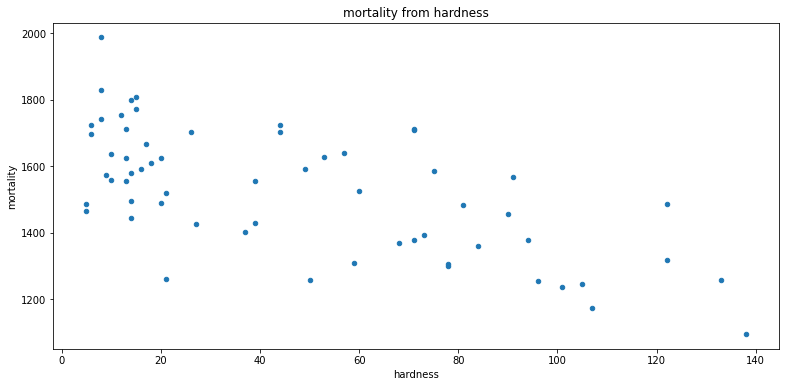

In [4]:
water_data.plot(kind='scatter',x='hardness', y='mortality', title='mortality from hardness')

In [5]:
water_data[['hardness', 'mortality']].corr()


,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [6]:
water_data[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Таким образом получается, что оценка корреляции по Пирсону и по Спирману примерно одинакова, хотя корелляция Спирмана чуть меньше. Это дополнительно усиливает гипотезу, что между смертностью и жесткостью воды существует статистическая зависимость

In [7]:
X = water_data[['hardness']]
y = water_data['mortality']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=10)

In [9]:
# НАйдем параметры линейной регрессии - коэффициент, свободный член и коэффициент детерминации
model = LinearRegression()
model.fit(X_train, y_train)
det_coeff = model.score(X_test, y_test)
print(f'{model.coef_}, {model.intercept_}, {det_coeff}')
# Полученные коэффициент детерминации показывает, что степень прогноза по имеющимся train данным довольно слабая
# что, в том числе, может объясняться малым объемом всей выборки


[-3.22952741], 1688.3652591531775, 0.33919400351032436


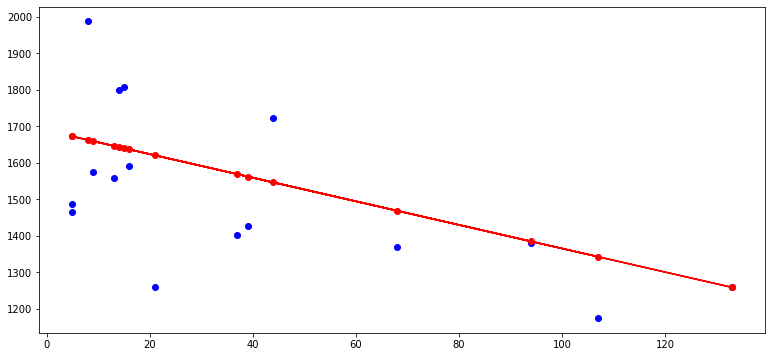

In [10]:
# Покажем на графике, как выглядят тестовые данные выборки и спрогнозированные с помощью регрессионной модели результаты
y_pred = model.predict(X_test)
plt.plot(X_test, y_test, 'bo')
plt.plot(X_test, y_pred,'ro-')

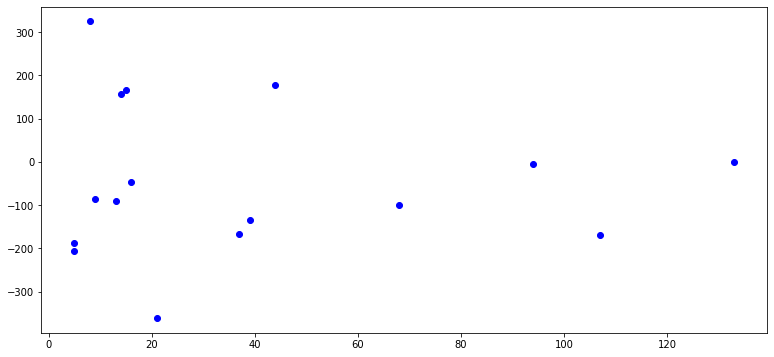

In [11]:
# Построим график остатков
residuals = [a-b for a,b in zip(y_test, y_pred)]
plt.plot(X_test, residuals, 'bo')
# Здесь мы видим, что распределение значений остатков не выглядит совсем случайным 

(array([1., 7., 4., 3., 1.]),
 array([-360.54518364, -223.5419549 ,  -86.53872615,   50.4645026 ,
         187.46773134,  324.47096009]),
 <BarContainer object of 5 artists>)

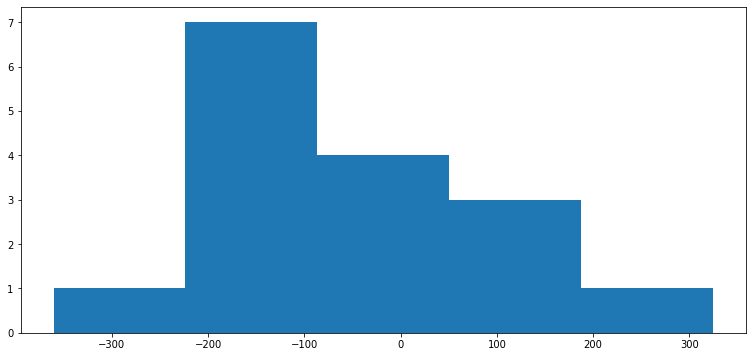

In [12]:
# Что дополнительно подтверждается гистогаммой их распределения - она не соответсвует нормальному распределению
plt.hist(residuals, 5)

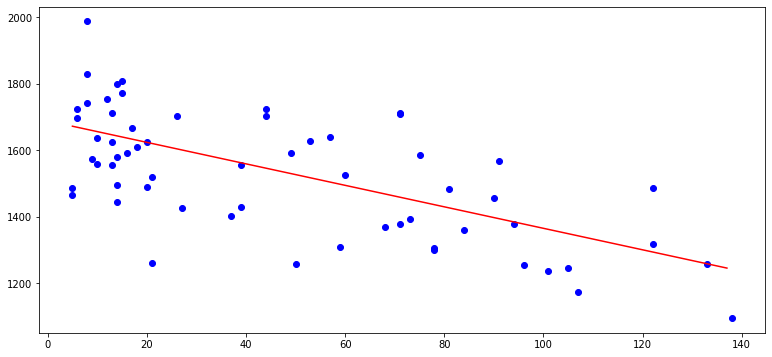

In [13]:
# Также покажем на графике все исходные значения и прямую, построенную согласно вычисленным коэффициентам регрессии
x_points = list(range(water_data['hardness'].min(), water_data['hardness'].max()))
y_points = list(map(lambda x: x * model.coef_ + model.intercept_, x_points))
plt.plot(water_data['hardness'], water_data['mortality'],'bo')
plt.plot(x_points, y_points, 'r-')
# Таким образом, зависимость между жесткостью воды и смертностью есть, но применение линейной регрессии для предсказания
# новых значений смертности дает не вполне удовлетворительный результат

Задание 2

In [40]:
water_data_north = water_data[water_data['location'] == 'North']
water_data_north.reset_index(inplace=True)
water_data_north = water_data_north.drop('index', 1)
water_data_south = water_data[water_data['location'] == 'South']
water_data_south.reset_index(inplace=True)
water_data_south = water_data_south.drop('index', 1)

<AxesSubplot:title={'center':'mortality from hardness in North'}, xlabel='hardness', ylabel='mortality'>

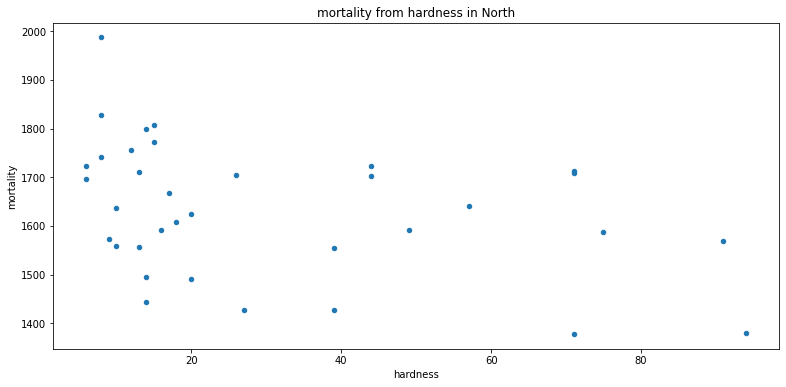

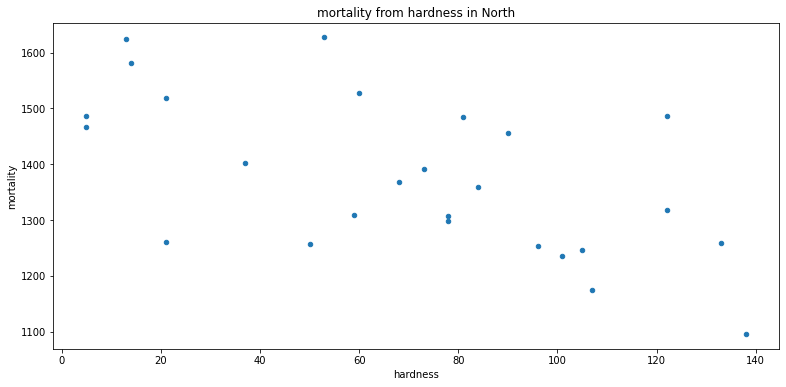

In [42]:
water_data_north.plot(kind='scatter',x='hardness', y='mortality', title='mortality from hardness in North')
water_data_south.plot(kind='scatter',x='hardness', y='mortality', title='mortality from hardness in Sorth')

In [44]:
print("North statistics")
print(water_data_north[['hardness', 'mortality']].corr())
print(water_data_north[['hardness', 'mortality']].corr(method='spearman'))
print("")
print("South statistics")
print(water_data_south[['hardness', 'mortality']].corr())
print(water_data_south[['hardness', 'mortality']].corr(method='spearman'))
# Как можно видеть, корелляция для северных районов Англии еще меньше, чем для суммарной выборки

North statistics
           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000
           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000

South statistics
           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000
           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000


In [78]:
X_n = water_data_north[['hardness']]
y_n = water_data_north['mortality']
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, train_size=0.8, random_state=3)

In [79]:
# НАйдем параметры линейной регрессии - коэффициент, свободный член и коэффициент детерминации
model = LinearRegression()
model.fit(X_train, y_train)
det_coeff = model.score(X_test, y_test)
print(f'{model.coef_}, {model.intercept_}, {det_coeff}')
# Коэффициен детерминации показывает, что прогнозные значения регресси будут весьма недостоверными

[-1.35144224], 1676.9478860394572, 0.2263590070111301


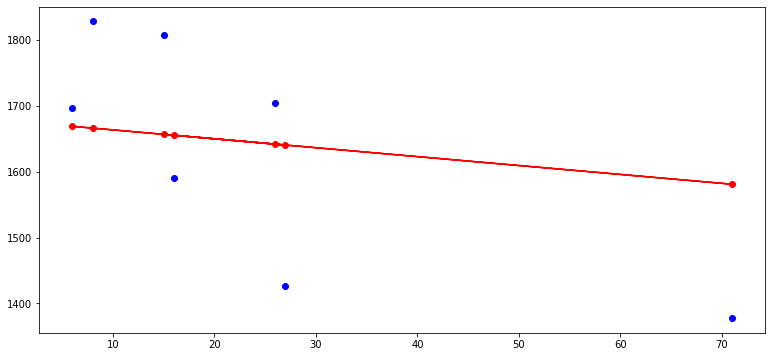

In [80]:
# Покажем на графике, как выглядят тестовые данные выборки и спрогнозированные с помощью регрессионной модели результаты
y_pred = model.predict(X_test)
plt.plot(X_test, y_test, 'bo')
plt.plot(X_test, y_pred,'ro-')

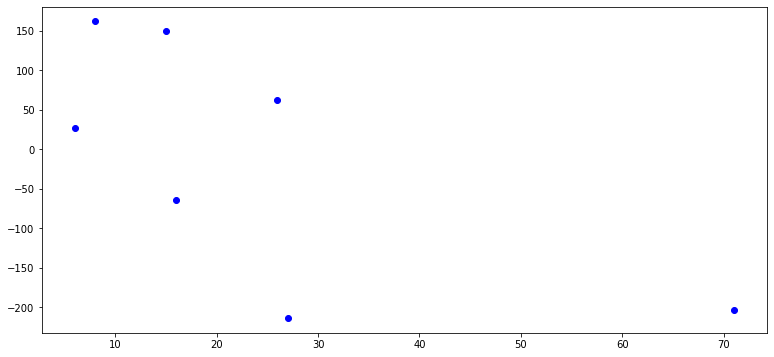

In [81]:
# Построим график остатков для северных городов Англии
residuals = [a-b for a,b in zip(y_test, y_pred)]
plt.plot(X_test, residuals, 'bo')

(array([2., 1., 0., 2., 2.]),
 array([-213.45894543, -138.39442596,  -63.32990649,   11.73461298,
          86.79913245,  161.86365192]),
 <BarContainer object of 5 artists>)

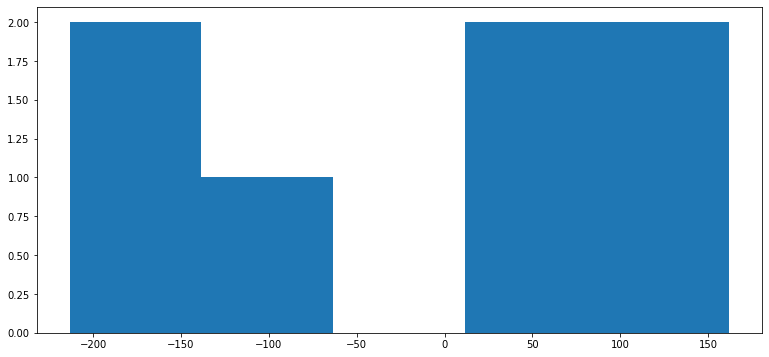

In [82]:
plt.hist(residuals, 5)

In [85]:
X_n = water_data_south[['hardness']]
y_n = water_data_south['mortality']
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, train_size=0.8, random_state=10)
# Найдем параметры линейной регрессии - коэффициент, свободный член и коэффициент детерминации
model = LinearRegression()
model.fit(X_train, y_train)
det_coeff = model.score(X_test, y_test)
print(f'{model.coef_}, {model.intercept_}, {det_coeff}')
# Коэффициен детерминации показывает, что прогнозные значения регресси будут достаточно достоверными

[-2.08656145], 1528.9655667144907, 0.767115029698684


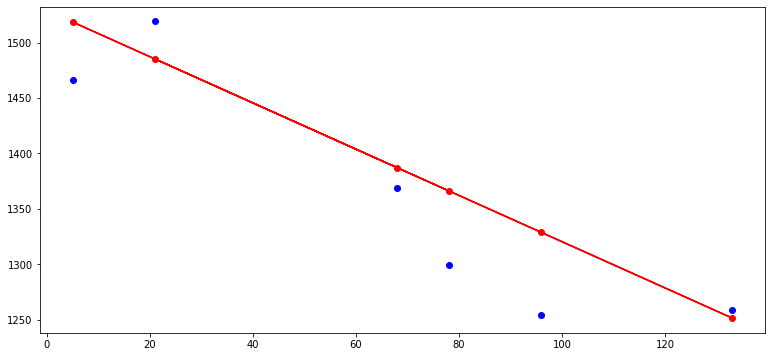

In [86]:
# Покажем на графике, как выглядят тестовые данные выборки и спрогнозированные с помощью регрессионной модели результаты
y_pred = model.predict(X_test)
plt.plot(X_test, y_test, 'bo')
plt.plot(X_test, y_pred,'ro-')

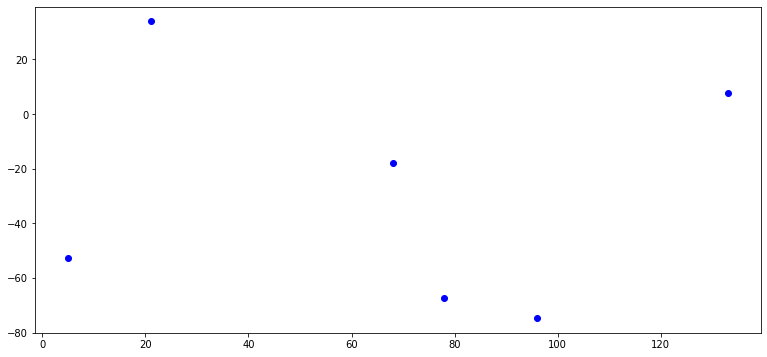

In [87]:
# Построим график остатков для южных городов Англии
residuals = [a-b for a,b in zip(y_test, y_pred)]
plt.plot(X_test, residuals, 'bo')
# Разброс остатков выглядит случаным